# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
import json
import random

from scipy.stats import linregress
from pprint import pprint

#Import Google and Weather Keys as well as Citipy
from config import g_key
from config import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
cities = []
latandLong=[]

lat = np.random.randint(-90,90,size=1750)
long = np.random.randint(-180,180,size=1750)
latandlongs=zip(lat,long)

#For Loop using citipy to determine cities close to desired location
for latandlong in latandlongs:
    city = citipy.nearest_city(latandlong[0], latandlong[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

673

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = weather_api_key
url = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

weather_response = requests.get(query_url + city).json()
print(json.dumps(weather_response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -54.8,
        "lon": -68.3
    },
    "dt": 1602645533,
    "id": 3833367,
    "main": {
        "feels_like": 24.67,
        "humidity": 93,
        "pressure": 979,
        "temp": 37.4,
        "temp_max": 37.4,
        "temp_min": 37.4
    },
    "name": "Ushuaia",
    "sys": {
        "country": "AR",
        "id": 8303,
        "sunrise": 1602667482,
        "sunset": 1602717187,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 8000,
    "weather": [
        {
            "description": "light intensity drizzle",
            "icon": "09n",
            "id": 300,
            "main": "Drizzle"
        }
    ],
    "wind": {
        "deg": 250,
        "speed": 17.22
    }
}


In [4]:
name =[]
country = []
lat = []
long = []
temp = []
hum = []
cloud = []
windspd = []
date = []

In [5]:
print('Loading')
print('-----------------------------')

for city in cities:
    try:
        response= requests.get(query_url + city).json()
        name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspd.append(response['wind']['speed'])
        date.append(response['dt'])
        record_name = response['name']
        print(f'Loading {record_name}')
    except:
        print('Error - City Not Found')
    continue

print('Data Retrieval Complete')

Loading
-----------------------------
Loading Bredasdorp
Loading Cape Town
Loading New Norfolk
Loading Albany
Loading Rikitea
Loading Yellowknife
Loading Puerto Ayora
Loading Qaanaaq
Loading Salalah
Loading Hervey Bay
Loading Port Hawkesbury
Loading Ushuaia
Error - City Not Found
Loading Camabatela
Loading Avarua
Loading Yerbogachën
Loading Kaitangata
Loading Pilar
Loading Fairbanks
Loading Salé
Loading Amasya Province
Loading Zhireken
Loading Karpogory
Loading Noumea
Loading Port Elizabeth
Loading Dawei
Loading Ponta do Sol
Loading Qaqortoq
Loading Rundu
Loading Krasnovishersk
Loading Tiznit Province
Loading Chokurdakh
Loading Atuona
Loading Arraial do Cabo
Loading Inhambane
Loading Peniche
Loading Nanortalik
Loading Amapá
Loading San Buenaventura
Loading Madaoua
Loading Anjozorobe
Loading Luena
Loading Punta Arenas
Loading Murgab
Error - City Not Found
Loading Sechura
Loading Codrington
Loading Hermanus
Loading Kuala Terengganu
Loading Mataura
Loading Japura
Loading Chui
Error - City

Loading Necochea
Loading Sørland
Loading Santa Fe
Loading Nelson Bay
Loading Saint-Augustin
Loading Nipawin
Loading San Patricio
Loading Inverell
Loading Mestia
Loading Benjamin Constant
Loading Pundaguitan
Loading Troitskiy
Error - City Not Found
Loading Biak
Loading Camaná
Loading Cabedelo
Loading Coyhaique
Loading Høyanger
Loading Claveria
Loading Glyadyanskoye
Loading Conakry
Loading Isiro
Loading Eilat
Loading Chara
Loading São Gabriel da Cachoeira
Loading Kota Kinabalu
Loading Maracaçumé
Loading Juan de Ayolas
Loading Charter Township of Clinton
Loading Tucumã
Loading Dunedin
Loading Suntar
Loading Miastko
Error - City Not Found
Loading Calabozo
Loading Los Llanos de Aridane
Loading Nyimba
Loading São Raimundo das Mangabeiras
Loading Sohag
Loading Klyuchi
Loading Cavalcante
Loading Forsytheganj
Loading Huallanca
Loading South Kazakhstan Region
Loading Lagoa
Loading Sinnamary
Loading Nhulunbuy
Loading Shakawe
Loading Bhādra
Loading Sioux Lookout
Loading Jacqueville
Loading Vostok


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
api_challenge={"City":name,"Latitude":lat,"Longitude":long,"Temperature":temp,"Humidity": hum,"Cloudiness": cloud,"Wind Speed":windspd,"Country": country,"Date":date}
#Create Dataframe "data"
data = pd.DataFrame(api_challenge)

In [7]:
#Print "Data" head to make sure it is working
#data.head()
data.head(10)

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bredasdorp,-34.53,20.04,48.20,87,49,2.24,ZA,1602645510
1,Cape Town,-33.93,18.42,53.51,76,0,6.93,ZA,1602645533
2,New Norfolk,-42.78,147.06,62.94,42,91,4.00,AU,1602645533
3,Albany,42.60,-73.97,51.53,74,38,5.01,US,1602645533
4,Rikitea,-23.12,-134.97,73.56,75,73,16.75,PF,1602645512
5,Yellowknife,62.46,-114.35,24.57,62,90,24.16,CA,1602645302
6,Puerto Ayora,-0.74,-90.35,67.98,90,48,6.33,EC,1602645410
7,Qaanaaq,77.48,-69.36,22.93,77,14,6.80,GL,1602645534
8,Salalah,17.02,54.09,75.20,69,0,3.36,OM,1602645534
9,Hervey Bay,-25.30,152.85,79.43,39,40,21.92,AU,1602645535


In [8]:
# Export to CSV
data.to_csv("Output/data.csv", index=False, header =True)
data.to_csv("../VacationPy/Output/data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#Look for cities with humidity over 100%
humidity = data.loc[data['Humidity']>100]
humidity

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
print('No Cities have Humidity over 100%')

No Cities have Humidity over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

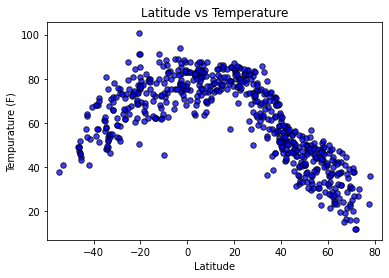

In [11]:
x_value = data['Latitude']
y_value = data['Temperature']

plt.scatter(x_value, y_value, marker="o", facecolors="blue", edgecolors="black",s=30, alpha=0.75)

#Use min and max functions for latitude to set x axis and while using +-5 to give space.
plt.xlim((data['Latitude'].min())-5,(data['Latitude'].max())+5)

#Use min and max functions for Temp while using +-5 to give space.
plt.ylim((data['Temperature'].min())-5,(data['Temperature'].max())+5)
plt.title('Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Tempurature (F)')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Temp.png')
plt.show()

## Latitude vs. Humidity Plot

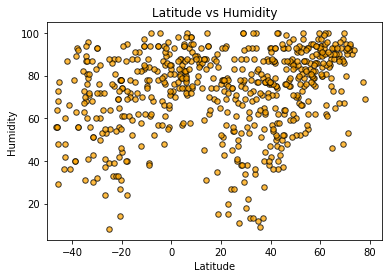

In [12]:
#Create Graph for Latitude and Humidity
x_value = data['Latitude']
y_value = data['Humidity']

plt.scatter(x_value, y_value, marker="o", facecolors="orange", edgecolors="black",
            s=30, alpha=0.75)
plt.xlim(-50, 85)

#Use min and max functions and to set axis while using +-5 to give space.
plt.ylim((data['Humidity'].min())-5,(data['Humidity'].max())+5)

plt.title('Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

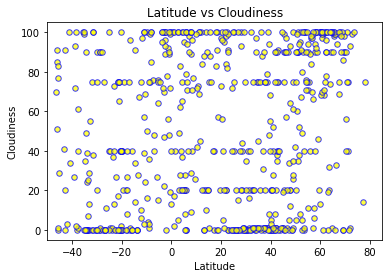

In [13]:
x_value = data['Latitude']
y_value = data['Cloudiness']

plt.scatter(x_value, y_value, marker="o", facecolors="yellow", edgecolors="blue",
            s=30, alpha=0.75)
plt.xlim(-50, 85)

#Use min and max functions and to set axis while using +-5 to give space.
plt.ylim((data['Cloudiness'].min())-5,(data['Cloudiness'].max())+5)

plt.title('Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Cloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

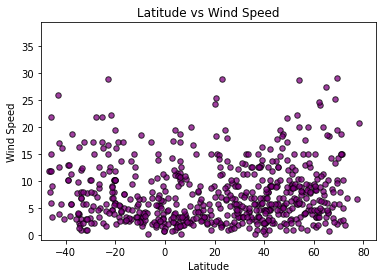

In [14]:
#Create Scatter Plot
x_value = data['Latitude']
y_value = data['Wind Speed']

plt.scatter(x_value, y_value, marker="o", facecolors="purple", edgecolors="black",
            s=30, alpha=0.75)
plt.xlim(-50, 85)

#Use min and max functions and to set axis while using +-5 to give space.
plt.ylim(((data['Wind Speed'].min())-1),(data['Wind Speed'].max())+5)

plt.title('Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Wind.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8914178098270038


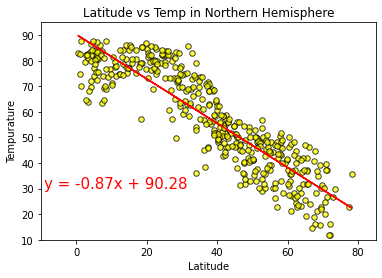

In [15]:
north = data.loc[data['Latitude']>=0]

x_values = north['Latitude']
y_values = north['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="yellow", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-9,30),fontsize=15,color="red")
plt.xlim(-10, 85)
plt.ylim(10,95 )
plt.title('Latitude vs Temp in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Tempurature')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Temp_Northern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6903302272335674


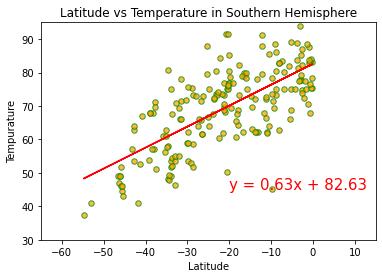

In [16]:
south = data.loc[data['Latitude']<=0]
x_values = south['Latitude']
y_values = south['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="orange", edgecolors="green",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20, 45),fontsize=15,color="red")
plt.xlim(-65, 15)
plt.ylim(30,95 )
plt.title('Latitude vs Temperature in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Tempurature')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Temp_Southern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14699779920700606


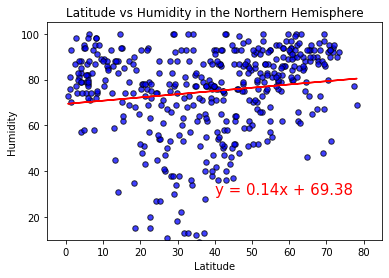

In [17]:
northern = data.loc[data['Latitude']>=0]

x_values = northern['Latitude']
y_values = northern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlim(-5, 85)
plt.ylim(10,105 )
plt.title('Latitude vs Humidity in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Humid_Northern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24329028620298537


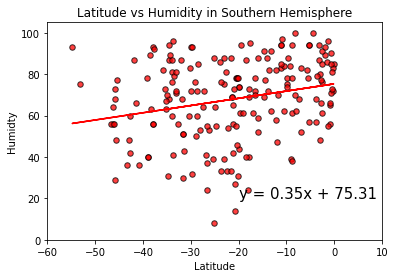

In [18]:
#So much Copy Pasta for these graphs
southern = data.loc[data['Latitude']<=0]
x_values = southern['Latitude']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20, 20),fontsize=15,color="black")
plt.xlim(-60, 10)
plt.ylim(0,105)
plt.title('Latitude vs Humidity in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidty')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Humidity_Southern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1602122767232109


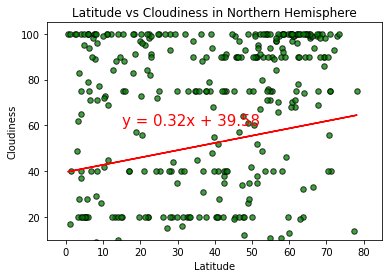

In [19]:
nhem = data.loc[data['Latitude']>=0]
x_values = nhem['Latitude']
y_values = nhem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="green", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,60),fontsize=15,color="red")
plt.xlim(-5, 85)
plt.ylim(10,105 )
plt.title('Latitude vs Cloudiness in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Cloud_Northern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.21065586911427736


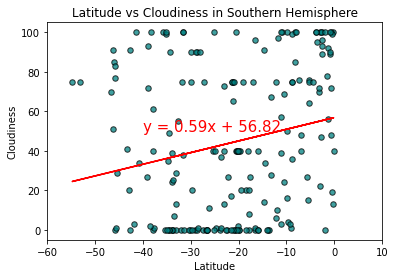

In [20]:
shem = data.loc[data['Latitude']<=0]
x_values = shem['Latitude']
y_values = shem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="teal", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40, 50),fontsize=15,color="red")
plt.xlim(-60, 10)
plt.ylim(-5,105)
plt.title('Latitude vs Cloudiness in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Cloud_Southern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15660172983690782


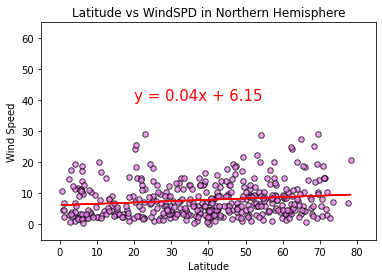

In [21]:
nwind = data.loc[data['Latitude']>=0]
x_values = nwind['Latitude']
y_values = nwind['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="violet", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.xlim(-5, 85)
plt.ylim(-5,65 )
plt.title('Latitude vs WindSPD in Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Wind_Northern.png')

print(f'The r-value is: {rvalue}')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.32185583114629207


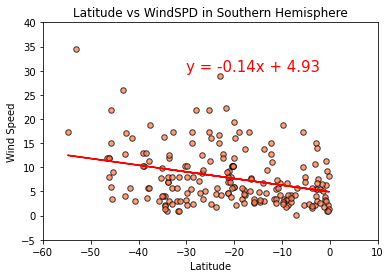

In [22]:
swind = data.loc[data['Latitude']<=0]
x_values = swind['Latitude']
y_values = swind['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="coral", edgecolors="black",
            s=30, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30, 30),fontsize=15,color="red")
plt.xlim(-60, 10)
plt.ylim(-5,40)
plt.title('Latitude vs WindSPD in Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#Create and Export Graph to a new file
plt.savefig('Output/Lat_Wind_Southern.png')

print(f'The r-value is: {rvalue}')

plt.show()